In [1]:
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10

from sklearn import *

import numpy as np
%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
df.Class.value_counts() / len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

default = 2 represent the loan got defaulted. We take this a postive event. 

In [6]:
target = "Class"
# Feature matrix, does not contain the target var
X = df.drop(columns=[target]) 


# label - dependent variable
y = preprocessing.LabelEncoder().fit_transform(df[target])

# One hot encoding for categorical variables
X_dummy = pd.get_dummies(X, drop_first=True) 

# splitting the data into training and test sets. 
# training dataset - we build the model
# testing dataset - we validate or test the model performance
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X_dummy, y
                     , test_size = 0.3 # controls the size of test data ... it a number between 0 and 1
                     , random_state = 1 # reproduce the the randomness
                    )
                    
# Pipeline encapsulates multiple operations 
# Idea is that when you feed data into the pipeline steps 
# are executed in chained fashion
pipe = pipeline.Pipeline([
    # Degree 2, at most power terms of an feature will be 2
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    # alpha: regularization parameter, alpha > 0
    ("est", linear_model.LogisticRegression())
])

# Using fit on pipe will fit invidual steps 
pipe.fit(X_train, y_train)

# Calculate the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [7]:
result = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})
result["match"] = result.actual == result.prediction
result.head()

,actual,prediction,match
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True


In [8]:
result.match.value_counts() / len(result)

True     0.999157
False    0.000843
Name: match, dtype: float64

In [9]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2599fc50>)

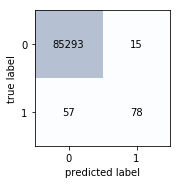

In [10]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))